## Import Libraries

In [34]:
# Setup
import numpy as np 
import pandas as pd 
import os
import pickle
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, PrecisionRecallDisplay, precision_recall_curve

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/model_evaluation_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(model, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, model, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, folder_path="models", file_name="untitled_model.sav"):
    pickle.dump(model, open(os.path.join(folder_path, file_name), 'wb'))

## Load Datasets

In [35]:
HEARTDISEASE_FULL_PATH = "dataset/afterpreprocessing/full"

x_test = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_x_test.csv'))
x_test.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2582,1,1,2,10,88,2,1,8,1,3,2,2,7,2,2,2
1,3396,2,1,2,88,88,2,1,9,5,1,1,3,8,2,2,2
2,2767,2,1,2,88,88,1,1,8,1,3,2,2,7,2,2,2
3,2923,2,1,2,88,20,2,2,5,1,3,2,3,4,2,2,2
4,2823,2,1,2,1,1,2,1,10,1,3,1,5,7,2,2,2


In [36]:
y_test = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_y_test.csv'))
y_test.head()

,heartDisease
0,2
1,2
2,2
3,2
4,2


In [37]:
HEARTDISEASE_RED_PATH = "dataset/afterpreprocessing/reduced"

red_x_test = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_x_test.csv'))
red_x_test.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity
0,2929,1,1,2,88,88,2,1,4,1,3,1
1,2371,1,1,2,88,88,2,1,12,1,3,1
2,2263,1,1,1,77,88,2,2,12,3,1,1
3,2929,1,1,1,3,88,2,1,11,1,1,2
4,3110,2,1,2,3,10,2,2,3,2,3,1


In [38]:
red_y_test = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_y_test.csv'))
red_y_test.head()

,heartDisease
0,2
1,1
2,1
3,1
4,2


## Load Models

In [39]:
# Load models
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")

DECISION_TREE_PATH = os.path.join(MODELS_PATH, 'decision_tree')
KNN_PATH = os.path.join(MODELS_PATH, 'knn')
LOGREG_PATH = os.path.join(MODELS_PATH, 'log_regression')
KMEANS_PATH = os.path.join(MODELS_PATH, 'kmeans')
RANDOMFOREST_PATH = os.path.join(MODELS_PATH, 'randomforest')
GAUSSIANNB_PATH = os.path.join(MODELS_PATH, 'gaussianNB')

full_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "full_decision_tree_model.sav"), 'rb'))
reduced_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "reduced_decision_tree_model.sav"), 'rb'))

full_knn_model = pickle.load(open(os.path.join(KNN_PATH, "full_knn_model.sav"), 'rb'))
reduced_knn_model = pickle.load(open(os.path.join(KNN_PATH, "reduced_knn_model.sav"), 'rb'))

full_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "full_logregression_model.sav"), 'rb'))
reduced_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "reduced_logregression_model.sav"), 'rb'))

full_gaussianNB_model = pickle.load(open(os.path.join(GAUSSIANNB_PATH, "full_gaussianNB_model.sav"), 'rb'))
reduced_gaussianNB_model = pickle.load(open(os.path.join(GAUSSIANNB_PATH, "reduced_gaussianNB_model.sav"), 'rb'))

full_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "full_randomforest_model.sav"), 'rb'))
reduced_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "reduced_randomforest_model.sav"), 'rb'))

full_models_names = ["Full Decision Tree", "Full Logistic Regression", "Full KNN", "Reduced Gaussian Naive Bayes", "Full Random Forest"]
reduced_models_names = ["Reduced Decision Tree", "Redcued Logistic Regression", "Reduced KNN", "Reduced Gaussian Naive Bayes", "Reduced Random Forest"]
full_models = [full_decisiontree_model, full_logregression_model, full_knn_model, full_gaussianNB_model, full_randomforest_model]
reduced_models = [reduced_decisiontree_model, reduced_logregression_model, reduced_knn_model, reduced_gaussianNB_model, reduced_randomforest_model]

## Full Feature Set

### Display Decision Tree Metrics Using Full Feature

Full Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 34360
Number of Negative Predictions (No Heart Disease): 71300
              precision    recall  f1-score   support

           1       0.20      0.73      0.31      9335
           2       0.96      0.71      0.82     96325

    accuracy                           0.72    105660
   macro avg       0.58      0.72      0.57    105660
weighted avg       0.90      0.72      0.78    105660

AUC: 0.793
Mean Absolute Error of the Full Decision Tree Model is 0.28409047889456746
False Positive Rate [0.         0.0167113  0.03899304 0.04295661 0.10048206 0.10369577
 0.14483128 0.14547402 0.26363149 0.26738082 0.27337975 0.38446706
 0.49951794 0.6948045  0.6970541  0.70251741 0.70423139 0.70937333
 0.71044456 0.74825924 0.76797001 0.78596679 0.81242635 0.81467595
 0.88012855 0.88130691 0.89512587 0.89523299 0.9196572  0.92115694
 0.94472416 0.99839314 1.        ] True Postitive Rate [0.         0.23913833 0.35930444 0.3

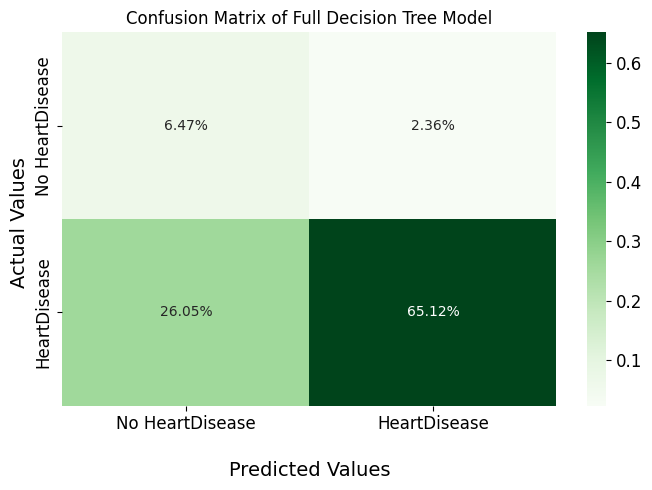

Saving figure ROC_Curve_of_Full_Decision_Tree_Model


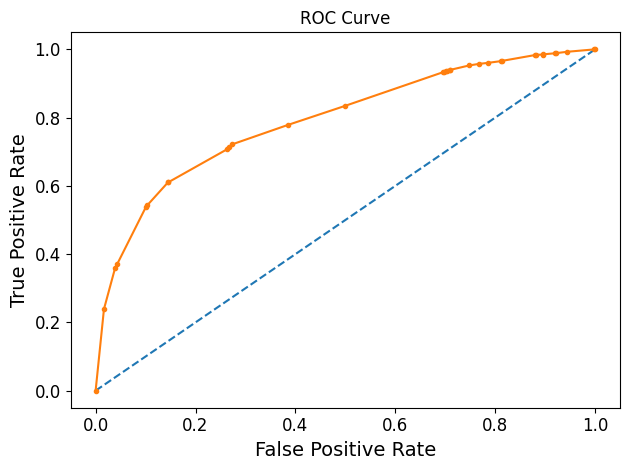

Saving figure Precision_Recall_Curve_of_Full_Decision_Tree_Model


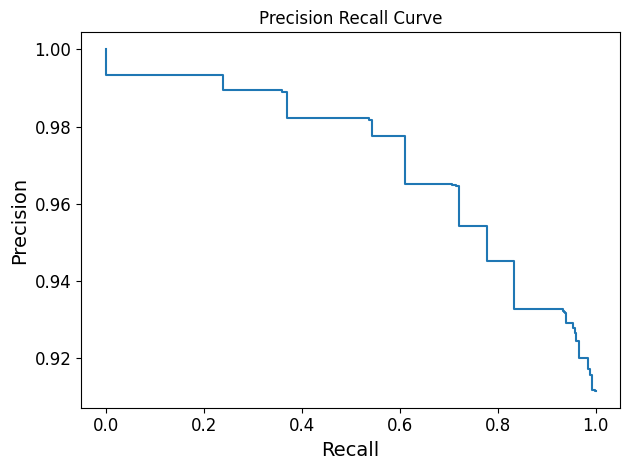

In [40]:
#Predict the response for test dataset
DECISION_TREE_PATH = os.path.join('decision_tree')
def evaluate_FullDecisionTree():
    print("Full Decision Tree Metrics:\n")
    clf = full_decisiontree_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate 
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the Full Decision Tree Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=2)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(DECISION_TREE_PATH,f"Confusion_Matrix_of_Full_Decision_Tree_Model")
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"ROC_Curve_of_Full_Decision_Tree_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Full_Decision_Tree_Model")
    plt.show()
    return fpr, tpr

fpr, tpr = evaluate_FullDecisionTree()

### Display Logistic Regression Metrics Using Full Feature

Full Logistic Regression Metrics:

Number of Positive Predictions (Heart Disease): 29570
Number of Negative Predictions (No Heart Disease): 76090
              precision    recall  f1-score   support

           1       0.23      0.73      0.35      9335
           2       0.97      0.76      0.85     96325

    accuracy                           0.76    105660
   macro avg       0.60      0.75      0.60    105660
weighted avg       0.90      0.76      0.81    105660

AUC: 0.819
Mean Absolute Error of the Full Logistic Regression Model is 0.23979746356236986
False Positive Rate [0.         0.         0.         ... 0.99978575 0.99978575 1.        ] True Postitive Rate [0.00000000e+00 1.03815209e-05 5.19076045e-05 ... 9.99989618e-01
 1.00000000e+00 1.00000000e+00]
Saving figure Confusion_Matrix_of_Full_Logistic_Regression_Model


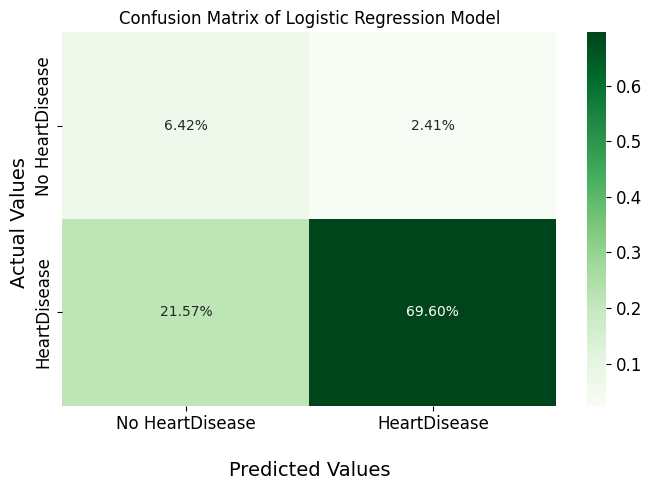

Saving figure ROC_Curve_of_Full_Logistic_Regression_Model


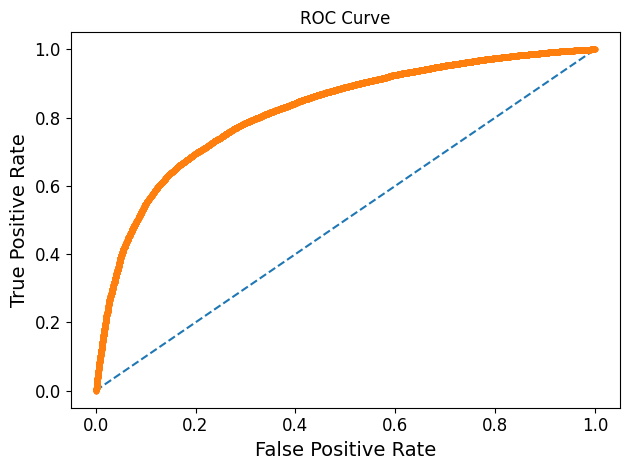

Saving figure Precision_Recall_Curve_of_Full_Decision_Tree_Model


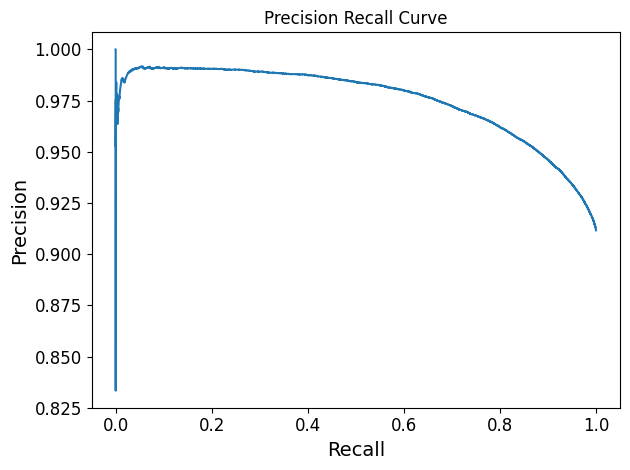

Saving figure Calibration_Curve_of_Full_Logistic_Regression_Model


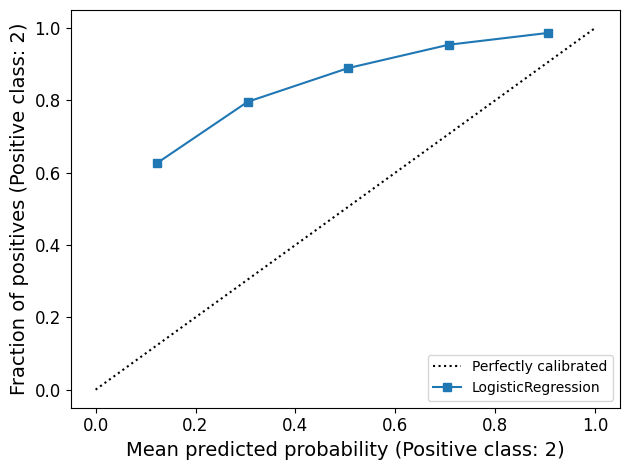

In [52]:
# Evaluate Logistic Regression model 
LOGREG_PATH = os.path.join('log_regression')

def evaluate_FullLogisticRegression():
    print("Full Logistic Regression Metrics:\n")
    clf = full_logregression_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the Full Logistic Regression Model is", mae)

    # calculate roc curve
    fpr, tpr,thresholds = roc_curve(y_test, probs, pos_label=2)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Logistic Regression Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(LOGREG_PATH,f"Confusion_Matrix_of_Full_Logistic_Regression_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(LOGREG_PATH,f"ROC_Curve_of_Full_Logistic_Regression_Model")
    plt.show()
    
    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Full_Decision_Tree_Model")
    plt.show()

    from sklearn.calibration import CalibrationDisplay
    disp = CalibrationDisplay.from_estimator(clf, x_test, y_test)
    save_fig(LOGREG_PATH,f"Calibration_Curve_of_Full_Logistic_Regression_Model")
    plt.show()
    return fpr, tpr

fpr1, tpr1 = evaluate_FullLogisticRegression()


### Display KNN Metrics Using Full Feature

Full KNN Metrics:

Number of Positive Predictions (Heart Disease): 36972
Number of Negative Predictions (No Heart Disease): 68688
              precision    recall  f1-score   support

           1       0.16      0.63      0.25      9335
           2       0.95      0.68      0.79     96325

    accuracy                           0.67    105660
   macro avg       0.55      0.65      0.52    105660
weighted avg       0.88      0.67      0.74    105660

AUC: 0.707
Mean Absolute Error of the KNN model is 0.3276452773045618
False Positive Rate [0.         0.08119979 0.19614355 0.37396893 0.59689341 0.8379218
 1.        ] True Postitive Rate [0.         0.33797041 0.5119647  0.67684402 0.82715806 0.94260057
 1.        ]
Saving figure Confusion_Matrix_of_Full_KNN_Model


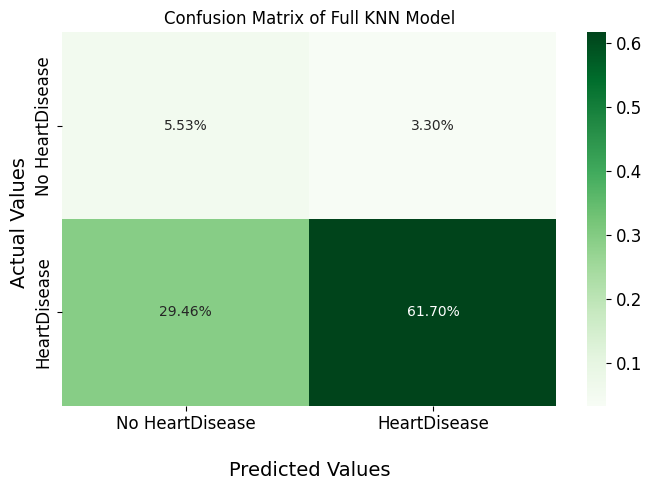

Saving figure ROC_Curve_of_KNN_Model


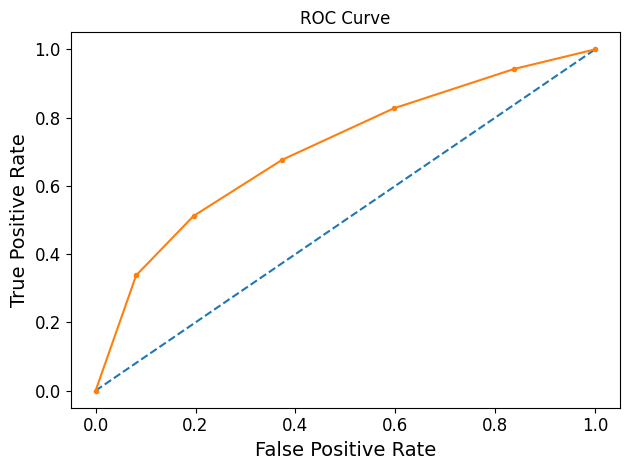

Saving figure Precision_Recall_Curve_of_KNN_Model


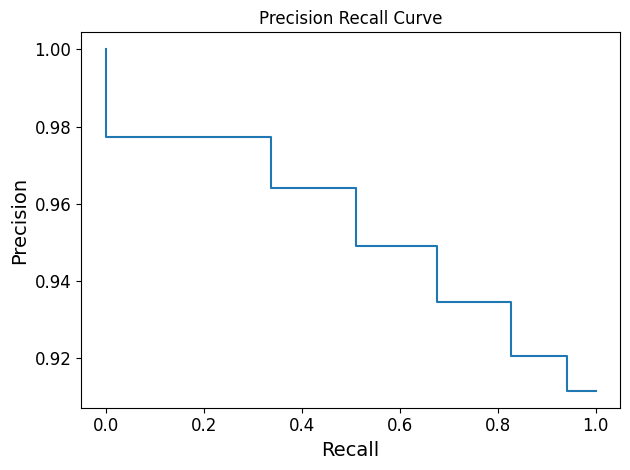

In [42]:
# Display KKN Metrics
KNN_PATH = os.path.join('knn')
def evaluate_FullKNN():
    print("Full KNN Metrics:\n")
    knn = full_knn_model
    y_pred = knn.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)
    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = knn.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=2)

    
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(LOGREG_PATH,f"Confusion_Matrix_of_Full_KNN_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(KNN_PATH,f"ROC_Curve_of_KNN_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KNN_PATH,f"Precision_Recall_Curve_of_KNN_Model")
    plt.show()
    return fpr,tpr

fpr2,tpr2 = evaluate_FullKNN()

### Display Gaussian Naive Bayes Metrics Using Full Feature

Full Gaussian Naive Bayes Metrics:

Number of Positive Predictions (Heart Disease): 21620
Number of Negative Predictions (No Heart Disease): 84040
              precision    recall  f1-score   support

           1       0.25      0.58      0.35      9335
           2       0.95      0.83      0.89     96325

    accuracy                           0.81    105660
   macro avg       0.60      0.70      0.62    105660
weighted avg       0.89      0.81      0.84    105660

AUC: 0.799
Mean Absolute Error of the Full Gaussian Naive Bayes Model is 0.19105621805792164
False Positive Rate [0.         0.         0.         ... 0.99989288 0.99989288 1.        ] True Postitive Rate [0.00000000e+00 2.07630418e-05 2.59538022e-04 ... 9.99854659e-01
 1.00000000e+00 1.00000000e+00]
Saving figure Confusion_Matrix_of_Full_GaussianNB_Model


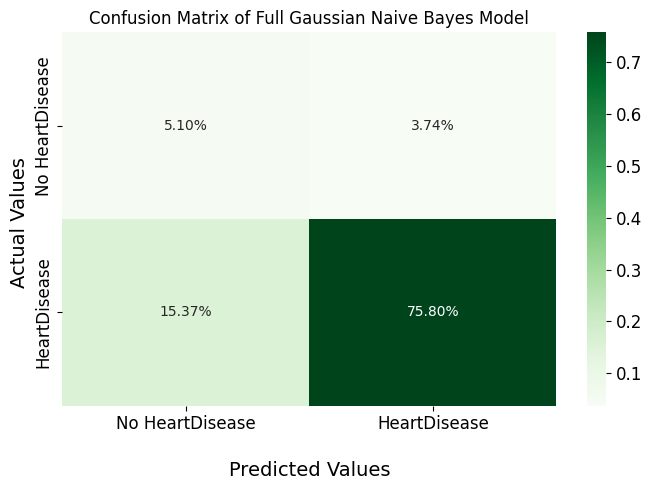

Saving figure ROC_Curve_of_Full_GaussianNB_Model


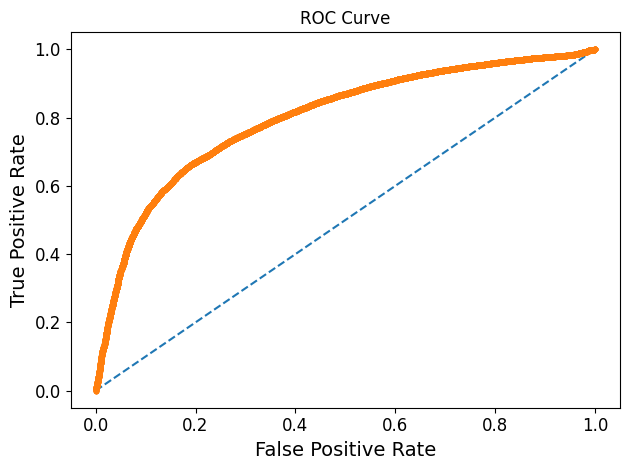

Saving figure Precision_Recall_Curve_of_Full_GaussianNB_Model


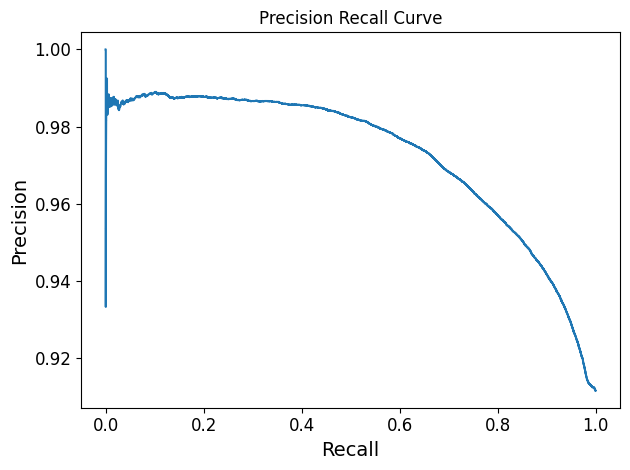

In [43]:
# Display GaussianNB Metrics
GaussianNB_PATH = os.path.join('gaussianNB')
def evaluate_FullGaussianNB():
    print("Full Gaussian Naive Bayes Metrics:\n")
    clf = full_gaussianNB_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # print True and False Positive Rates

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the Full Gaussian Naive Bayes Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=2)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full Gaussian Naive Bayes Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(GaussianNB_PATH,f"Confusion_Matrix_of_Full_GaussianNB_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(GaussianNB_PATH,f"ROC_Curve_of_Full_GaussianNB_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(GaussianNB_PATH,f"Precision_Recall_Curve_of_Full_GaussianNB_Model")
    plt.show()
    return fpr, tpr

fpr3, tpr3 = evaluate_FullGaussianNB()

### Display Random Forest Metrics Using Full Feature

Full Random Forest Metrics:

Number of Positive Predictions (Heart Disease): 28956
Number of Negative Predictions (No Heart Disease): 76704
              precision    recall  f1-score   support

           1       0.22      0.68      0.33      9335
           2       0.96      0.77      0.85     96325

    accuracy                           0.76    105660
   macro avg       0.59      0.72      0.59    105660
weighted avg       0.90      0.76      0.81    105660

AUC: 0.801
Mean Absolute Error of the KNN model is 0.24165247018739353
False Positive Rate [0.         0.00696304 0.00696304 ... 0.99282271 0.99282271 1.        ] True Postitive Rate [0.         0.09811575 0.09812614 ... 0.99888918 0.99889956 1.        ]
Saving figure Confusion_Matrix_of_Full_Random_Forest_Model


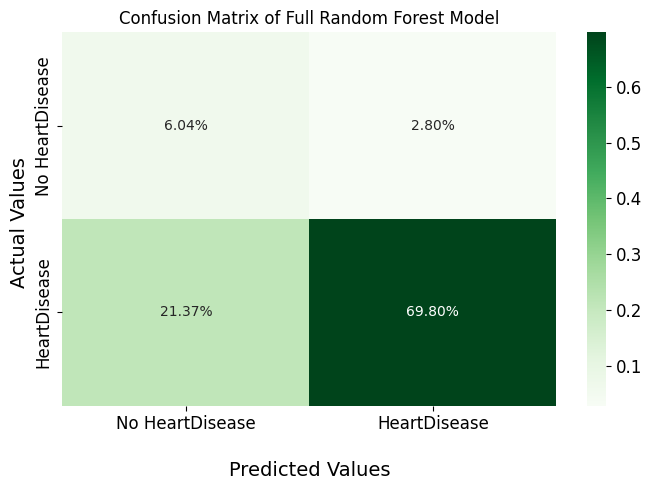

Saving figure ROC_Curve_of_Reduced_Random_Forest_Model


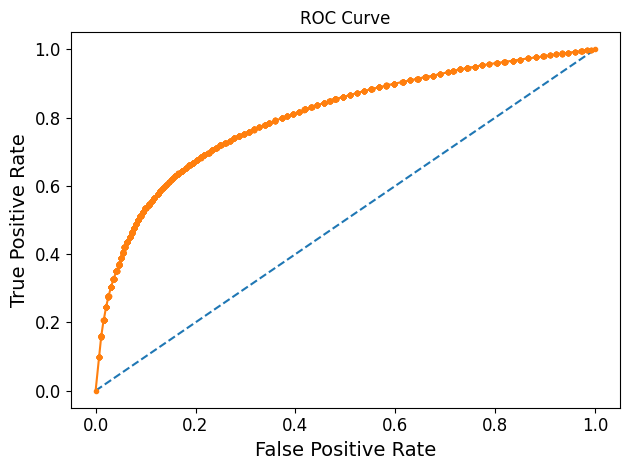

Saving figure Precision_Recall_Curve_of_Full_Random_Forest_Model


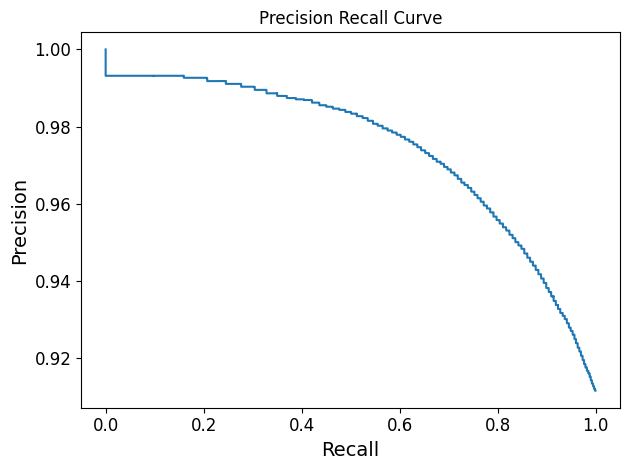

In [53]:
# Display Reduced Random Forest Metrics
RANDOMFOREST_PATH = os.path.join('randomforest')
def evaluate_FullRandomForest():
    print("Full Random Forest Metrics:\n")
    full_rf = full_randomforest_model
    y_pred = full_rf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))
    
    # predict probabilities
    probs = full_rf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=2)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full Random Forest Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(RANDOMFOREST_PATH,f"Confusion_Matrix_of_Full_Random_Forest_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"ROC_Curve_of_Reduced_Random_Forest_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"Precision_Recall_Curve_of_Full_Random_Forest_Model")
    plt.show()
    return fpr, tpr

fpr4, tpr4 = evaluate_FullRandomForest()

## Reduced Feature Set

### Display Decision Tree Metrics Using Reduced Feature

Reduced Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 14565
Number of Negative Predictions (No Heart Disease): 11699
              precision    recall  f1-score   support

           1       0.74      0.82      0.77     13115
           2       0.80      0.71      0.75     13149

    accuracy                           0.76     26264
   macro avg       0.77      0.76      0.76     26264
weighted avg       0.77      0.76      0.76     26264

AUC: 0.836
Mean Absolute Error of the Reduced Decision Tree Model is 0.23781602193116053
False Positive Rate [0.         0.01174228 0.03080442 0.03240564 0.03293938 0.07655356
 0.07952726 0.11399161 0.17811666 0.18284407 0.19046893 0.25276401
 0.3251239  0.32710637 0.50194434 0.50385055 0.52016775 0.52481891
 0.5627907  0.61425848 0.62882196 0.63614182 0.71971026 0.82127335
 0.82478079 0.82561952 0.85878765 0.87167366 0.87357987 0.87617232
 0.9974838  1.        ] True Postitive Rate [0.         0.23545517 0.35728953 0.368012

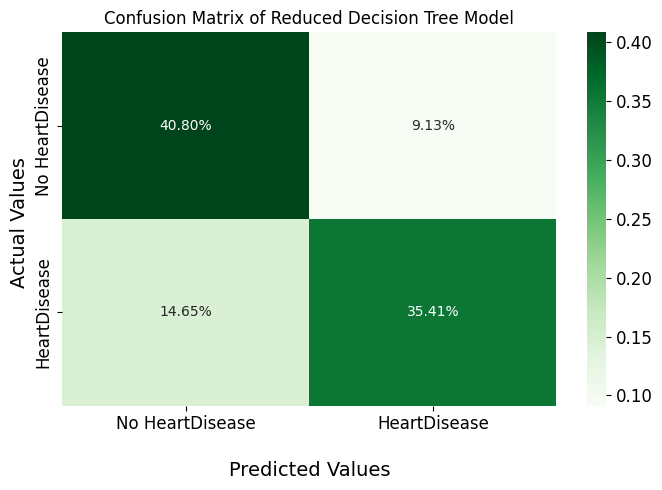

Saving figure ROC_Curve_of_Reduced_Decision_Tree_Model


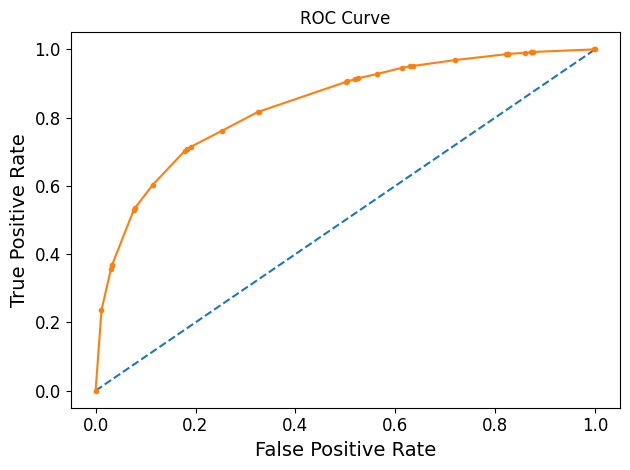

Saving figure Precision_Recall_Curve_of_Reduced_Decision_Tree_Model


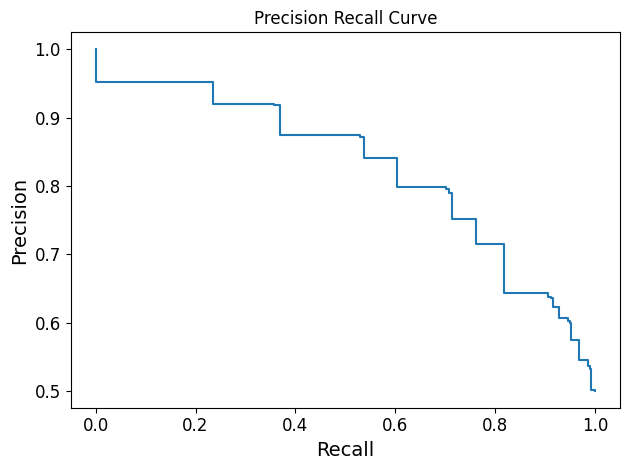

In [45]:
#Predict the response for test dataset

def evaluate_ReducedDecisionTree():
    print("Reduced Decision Tree Metrics:\n")
    reduced_dt = reduced_decisiontree_model
    y_pred = reduced_dt.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate 
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = reduced_dt.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Decision Tree Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs,
                                    pos_label=2)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Reduced Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(DECISION_TREE_PATH,f"Confusion_Matrix_of_Reduced_Decision_Tree_Model")
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"ROC_Curve_of_Reduced_Decision_Tree_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Reduced_Decision_Tree_Model")
    plt.show()
    return fpr, tpr

fpr5, tpr5 = evaluate_ReducedDecisionTree()

### Display Logistic Regression Metrics Using Reduced Feature

Reduced Logistic Regression Metrics:

Number of Positive Predictions (Heart Disease): 13726
Number of Negative Predictions (No Heart Disease): 12538
              precision    recall  f1-score   support

           1       0.75      0.79      0.77     13115
           2       0.78      0.74      0.76     13149

    accuracy                           0.76     26264
   macro avg       0.77      0.76      0.76     26264
weighted avg       0.77      0.76      0.76     26264

AUC: 0.837
Mean Absolute Error of the Reduced Logistic Regression Model is 0.235493451111788
False Positive Rate [0.00000000e+00 7.62485703e-05 7.62485703e-05 ... 9.96873809e-01
 9.97026306e-01 1.00000000e+00] True Postitive Rate [0.00000000e+00 0.00000000e+00 6.84462697e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Saving figure Confusion_Matrix_of_Logistic_Regression_Model


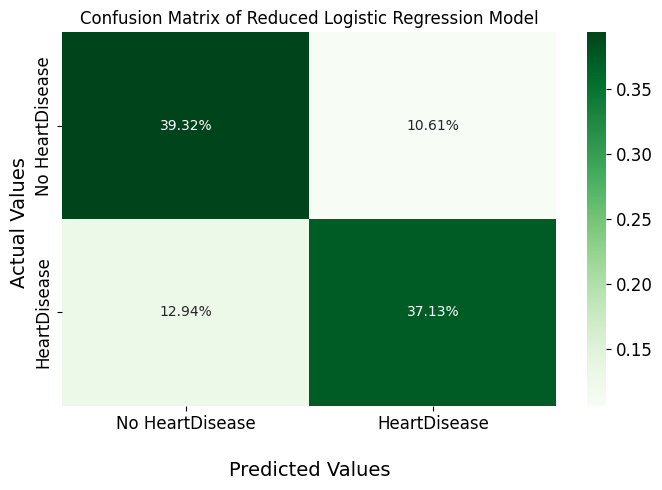

Saving figure ROC_Curve_of_Reduced_Logistic_Regression_Model


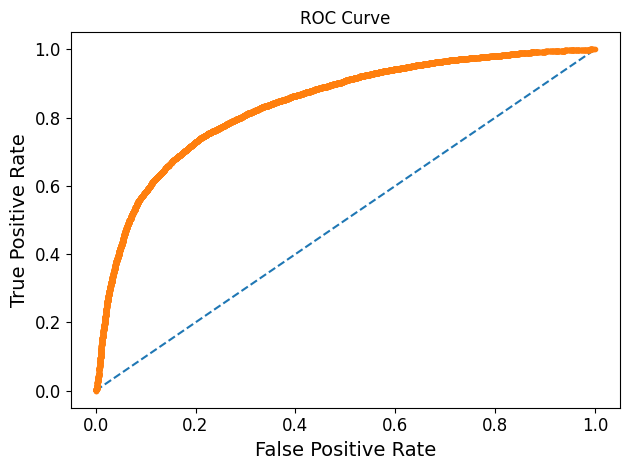

Saving figure Calibration_Curve_of_Reduced_Logistic_Regression_Model


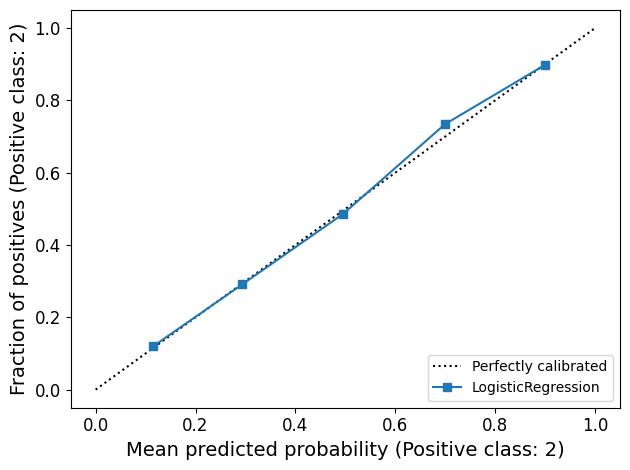

Saving figure Precision_Recall_Curve_of_Reduced_KNN_Model


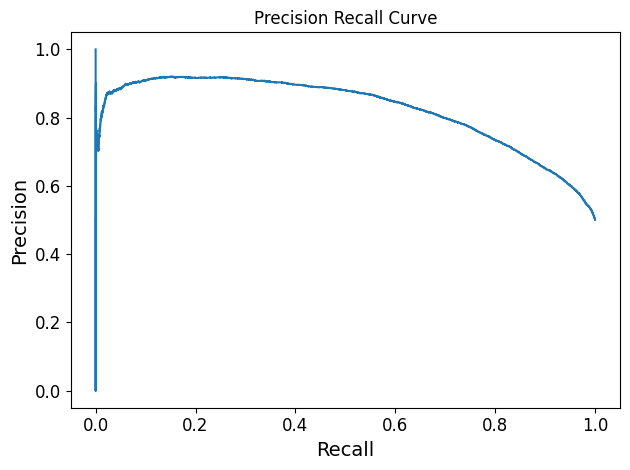

In [51]:
# Evaluate Logistic Regression model 
LOGREG_PATH = os.path.join('log_regression')

def evaluate_ReducedLogisticRegression():
    print("Reduced Logistic Regression Metrics:\n")
    clf = reduced_logregression_model
    y_pred = clf.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Logistic Regression Model is", mae)

    # calculate roc curve
    fpr, tpr,thresholds = roc_curve(red_y_test, probs, pos_label=2)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Reduced Logistic Regression Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(LOGREG_PATH,f"Confusion_Matrix_of_Logistic_Regression_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(LOGREG_PATH,f"ROC_Curve_of_Reduced_Logistic_Regression_Model")
    plt.show()
    
    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KNN_PATH,f"Precision_Recall_Curve_of_Reduced_KNN_Model")
    plt.show()

    # Plot Calibration Curve Display
    disp = CalibrationDisplay.from_estimator(clf, red_x_test, red_y_test)
    save_fig(LOGREG_PATH,f"Calibration_Curve_of_Reduced_Logistic_Regression_Model")
    plt.show()
    
    return fpr, tpr

fpr6, tpr6 = evaluate_ReducedLogisticRegression()


### Display KNN Metrics Using Reduced Feature

Reduced KNN Metrics:

Number of Positive Predictions (Heart Disease): 14953
Number of Negative Predictions (No Heart Disease): 11311
              precision    recall  f1-score   support

           1       0.70      0.79      0.74     13115
           2       0.76      0.66      0.70     13149

    accuracy                           0.73     26264
   macro avg       0.73      0.73      0.72     26264
weighted avg       0.73      0.73      0.72     26264

AUC: 0.787
Mean Absolute Error of the Reduced Logistic Regression Model is 0.2747487054523302
False Positive Rate [0.         0.02302707 0.08433092 0.20503241 0.42828822 0.72756386
 1.        ] True Postitive Rate [0.         0.29819758 0.48528405 0.65571526 0.8137501  0.93862651
 1.        ]
Saving figure Confusion_Matrix_of_Reduced_KNN_Model


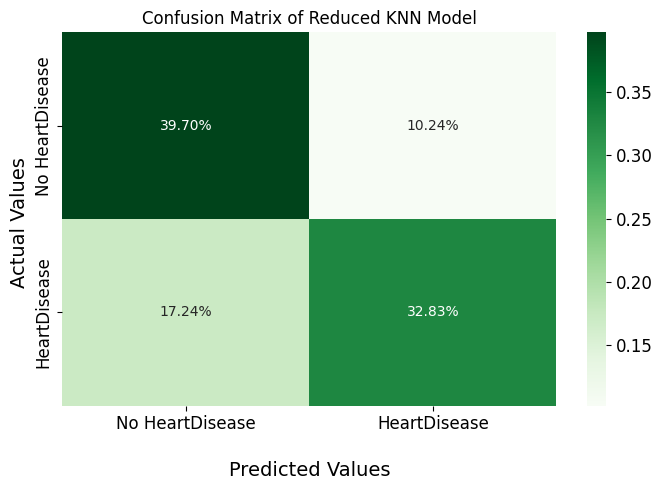

Saving figure ROC_Curve_of_Reduced_KNN_Model


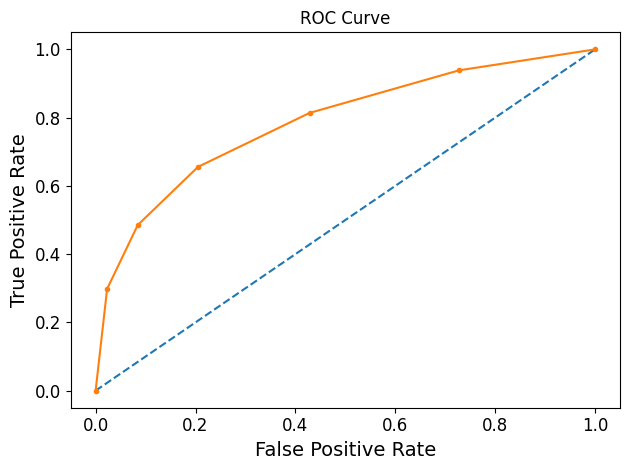

Saving figure Precision_Recall_Curve_of_Reduced_KNN_Model


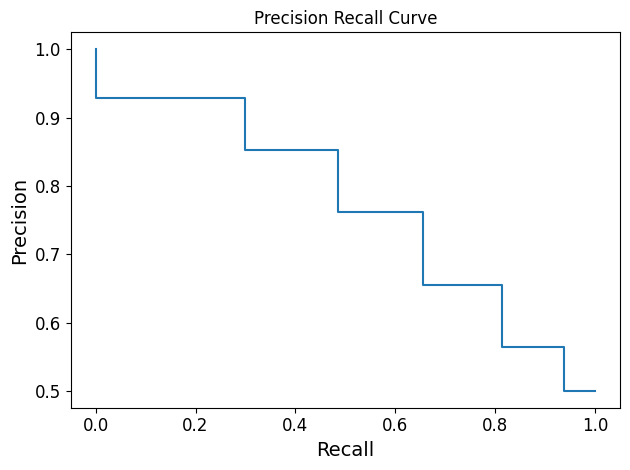

In [47]:
# Display KKN Metrics
KNN_PATH = os.path.join('knn')
def evaluate_ReducedKNN():
    print("Reduced KNN Metrics:\n")
    knn = reduced_knn_model
    y_pred = knn.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)
    # evaluate
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = knn.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs, pos_label=2)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Logistic Regression Model is", mae)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    
    # confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Reduced KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(LOGREG_PATH,f"Confusion_Matrix_of_Reduced_KNN_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(KNN_PATH,f"ROC_Curve_of_Reduced_KNN_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KNN_PATH,f"Precision_Recall_Curve_of_Reduced_KNN_Model")
    plt.show()
    return fpr,tpr

fpr7,tpr7 = evaluate_ReducedKNN()

### Display Gaussian Naive Bayes Metrics Using Reduced Feature

Reduced Gaussian Naive Bayes Metrics:

Number of Positive Predictions (Heart Disease): 11405
Number of Negative Predictions (No Heart Disease): 14859
              precision    recall  f1-score   support

           1       0.77      0.67      0.72     13115
           2       0.71      0.80      0.75     13149

    accuracy                           0.74     26264
   macro avg       0.74      0.74      0.74     26264
weighted avg       0.74      0.74      0.74     26264

AUC: 0.826
Mean Absolute Error of the Reduced Gaussian Naive Bayes model is 0.261422479439537
False Positive Rate [0.         0.         0.         ... 0.99992375 0.99992375 1.        ] True Postitive Rate [0.00000000e+00 7.60514108e-05 8.36565518e-04 ... 9.99923949e-01
 1.00000000e+00 1.00000000e+00]
Saving figure Confusion_Matrix_of_Reduced_GaussianNB_Model


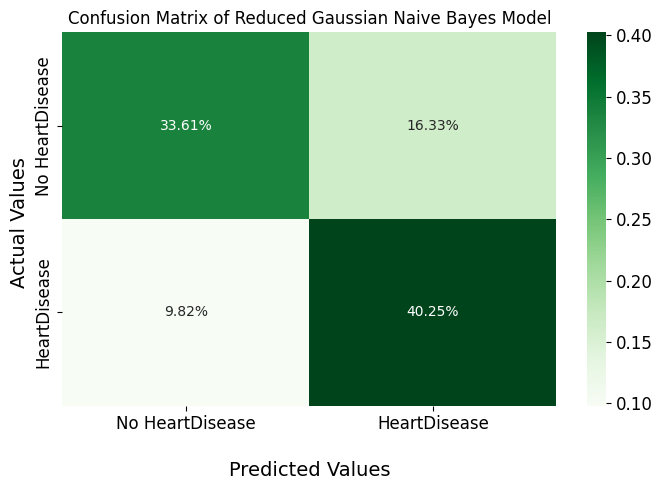

Saving figure ROC_Curve_of_Reduced_GaussianNB_Model


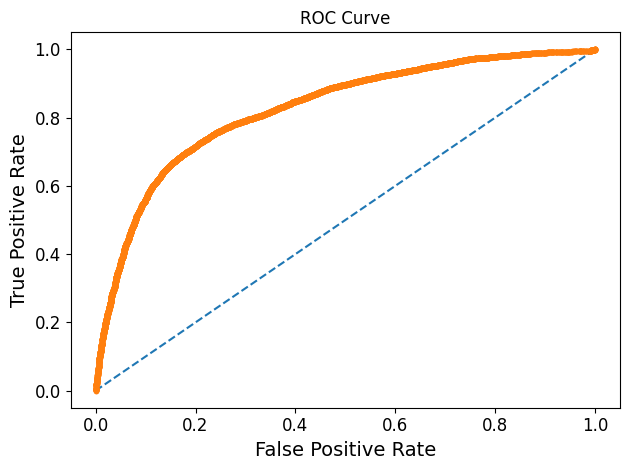

Saving figure Precision_Recall_Curve_of_Reduced_GaussianNB_Model


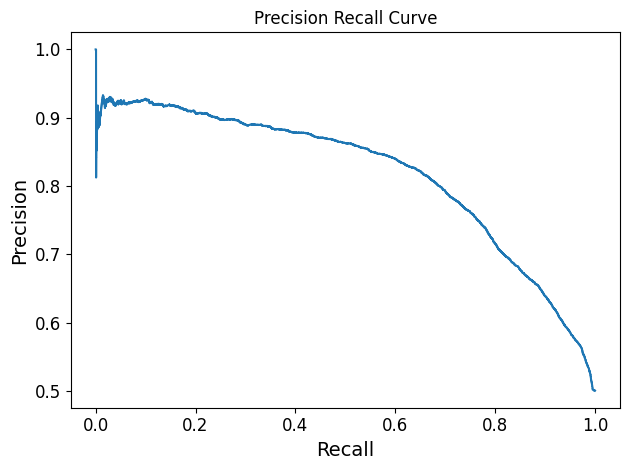

In [48]:
# Display Reduced Gaussian Naive Bayes Metrics

def evaluate_ReducedGaussianNB():
    print( "Reduced Gaussian Naive Bayes Metrics:\n")
    reduced_gaussianNB = reduced_gaussianNB_model
    y_pred = reduced_gaussianNB.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = reduced_gaussianNB.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Gaussian Naive Bayes model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs, pos_label=2)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Reduced Gaussian Naive Bayes Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(GaussianNB_PATH,f"Confusion_Matrix_of_Reduced_GaussianNB_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(GaussianNB_PATH, f"ROC_Curve_of_Reduced_GaussianNB_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(GaussianNB_PATH, f"Precision_Recall_Curve_of_Reduced_GaussianNB_Model")
    plt.show()
    return fpr, tpr

fpr8, tpr8 = evaluate_ReducedGaussianNB()


### Display Random Forest Metrics Using Reduced Feature

Reduced Random Forest Metrics:

Number of Positive Predictions (Heart Disease): 13909
Number of Negative Predictions (No Heart Disease): 12355
              precision    recall  f1-score   support

           1       0.75      0.80      0.78     13115
           2       0.79      0.74      0.76     13149

    accuracy                           0.77     26264
   macro avg       0.77      0.77      0.77     26264
weighted avg       0.77      0.77      0.77     26264

AUC: 0.851
Mean Absolute Error of the Reduced Random Forest model is 0.23096253426743832
False Positive Rate [0.         0.00693862 0.00701487 ... 0.88905833 0.88913458 1.        ] True Postitive Rate [0.         0.14252034 0.1429006  ... 0.9943722  0.9943722  1.        ]
Saving figure Confusion_Matrix_of_Reduced_Random_Forest_Model


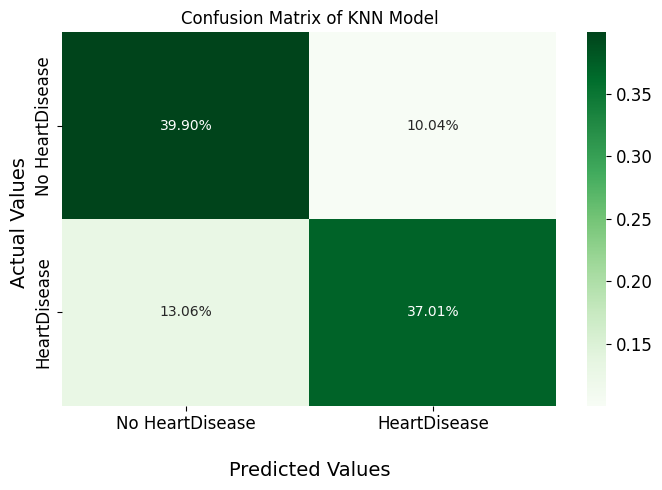

Saving figure ROC_Curve_of_Reduced_Random_Forest_Model


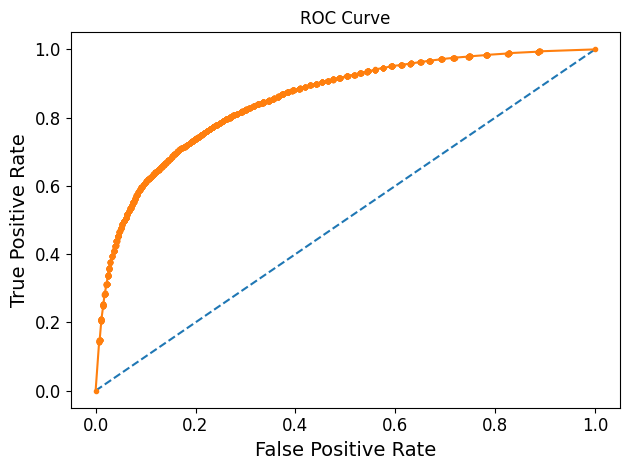

Saving figure Precision_Recall_Curve_of_Reduced_Random_Forest_Model


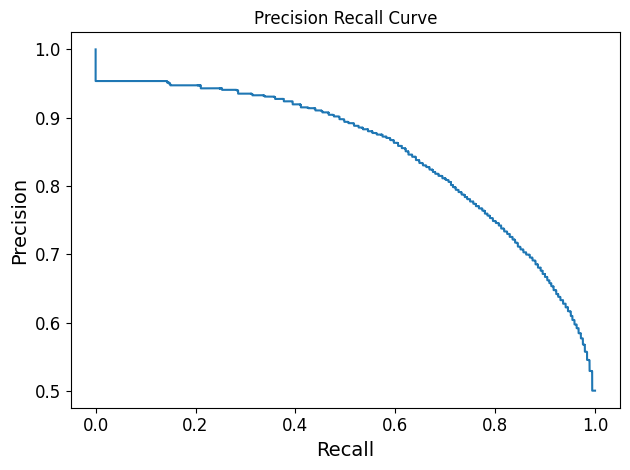

In [49]:
# Display Reduced Random Forest Metrics
RANDOMFOREST_PATH = os.path.join('randomforest')
def evaluate_ReducedRandomForest():
    print("Reduced Random Forest Metrics:\n")
    reduced_rf = reduced_randomforest_model
    y_pred = reduced_rf.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))
    
    # predict probabilities
    probs = reduced_rf.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Random Forest model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs,pos_label=2)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(RANDOMFOREST_PATH,f"Confusion_Matrix_of_Reduced_Random_Forest_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"ROC_Curve_of_Reduced_Random_Forest_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=2)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"Precision_Recall_Curve_of_Reduced_Random_Forest_Model")
    plt.show()
    return fpr, tpr

fpr9, tpr9 = evaluate_ReducedRandomForest()

Saving figure ROC_Curve_of_All_Models


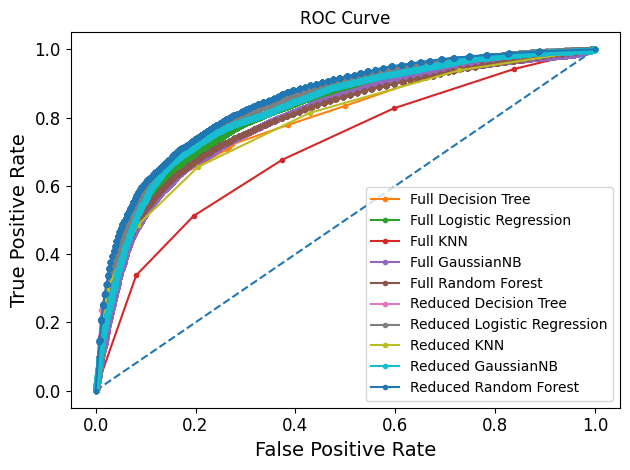

In [50]:
# ROC Curve with all models
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Full Decision Tree')
plt.plot(fpr1, tpr1, marker='.', label='Full Logistic Regression')
plt.plot(fpr2, tpr2, marker='.', label='Full KNN')
plt.plot(fpr3, tpr3, marker='.', label='Full GaussianNB')
plt.plot(fpr4, tpr4, marker='.', label='Full Random Forest')

plt.plot(fpr5, tpr5, marker='.', label='Reduced Decision Tree')
plt.plot(fpr6, tpr6, marker='.', label='Reduced Logistic Regression')
plt.plot(fpr7, tpr7, marker='.', label='Reduced KNN')
plt.plot(fpr8, tpr8, marker='.', label='Reduced GaussianNB')
plt.plot(fpr9, tpr9, marker='.', label='Reduced Random Forest')


# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
# show the plot
save_fig(
    'allmodels',
    "ROC_Curve_of_All_Models")
plt.show()
